# Artificial Neural Networks 2024.1


## Implementation of Neural Networks using Scikit Learn

* Professor: Elloá B. Guedes - ebgcosta@uea.edu.br

* Student: Danilo Bruno da Silva - dbds.eng21@uea.edu.br


### Circumstance: Fuel Usage

The objective of this practical activity is to use Machine Learning tools in the Python environment, utilizing the pandas and scikit-learn libraries, to predict the fuel consumption of vehicles.

### Database

Available at https://archive.ics.uci.edu/ml/datasets/auto+mpg

### Libs

By habit, the first cell of the notebook is usually reserved for importing libraries.
With each new library added, it is necessary to run the cell for updating and correct execution.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Opening the Dataset

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [14]:
data_path = "autompg.csv"
data = pd.read_csv(data_path, sep=';')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Knowing the dataset

To practice concepts related to exploring the dataset, use the following cells to provide answers to the following questions:

1. How many examples are there in the dataset?
2. What attributes exist in the dataset?
3. What are the names of the cars in the dataset?
4. What are the characteristics of the 'chevrolet camaro'?
5. What is the average consumption, in gallons per liter, of the cars in the dataset?

In [15]:
size = len(data)
print(f"There are {size} cars in the dataset")

There are 406 cars in the dataset


In [16]:
properties = data.columns.tolist()
properties

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'modelyear',
 'origin',
 'name']

In [17]:
data_labels = data['name'].unique()
", ".join(data_labels)

"chevrolet chevelle malibu, buick skylark 320, plymouth satellite, amc rebel sst, ford torino, ford galaxie 500, chevrolet impala, plymouth fury iii, pontiac catalina, amc ambassador dpl, citroen ds-21 pallas, chevrolet chevelle concours (sw), ford torino (sw), plymouth satellite (sw), amc rebel sst (sw), dodge challenger se, plymouth 'cuda 340, ford mustang boss 302, chevrolet monte carlo, buick estate wagon (sw), toyota corona mark ii, plymouth duster, amc hornet, ford maverick, datsun pl510, volkswagen 1131 deluxe sedan, peugeot 504, audi 100 ls, saab 99e, bmw 2002, amc gremlin, ford f250, chevy c20, dodge d200, hi 1200d, chevrolet vega 2300, toyota corona, ford pinto, volkswagen super beetle 117, plymouth satellite custom, ford torino 500, amc matador, pontiac catalina brougham, dodge monaco (sw), ford country squire (sw), pontiac safari (sw), amc hornet sportabout (sw), chevrolet vega (sw), pontiac firebird, ford mustang, mercury capri 2000, opel 1900, peugeot 304, fiat 124b, toyo

In [18]:
camaro_data = data[data['name'] == 'chevrolet camaro']
camaro_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro


In [19]:
data['gpl'] = 3.78541 / data['mpg'] # Convert from mpg to gpl -->  gpl = 3.78541 / mpg
gpl_average_consuption = data['gpl'].mean()
gpl_average_consuption

0.18045655620744197

### Data Preparation

1. There are examples with missing data. For simplicity, remove them from the dataset.
2. Exclude the column with car names.
3. Convert mpg to km/l knowing that: 1 mpg = 0.425 km/l. Use only two decimal places in this conversion.
4. Remove the mpg column and insert the kml column into the dataset.

In [20]:
print(f"Size before removing examples with missing data")
data = data.dropna()
size = len(data)
print(f"New size after remotion: {size}")

Size before removing examples with missing data
New size after remotion: 392


In [21]:
data = data.drop(columns=['name'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,gpl
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.210301
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.252361
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.210301
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.236588
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.222671


In [22]:
data['kml'] = (data['mpg'] * 0.425).round(2)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,gpl,kml
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.210301,7.65
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.252361,6.38
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.210301,7.65
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.236588,6.80
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.222671,7.22


In [11]:
data = data.drop(columns=["mpg"])
data.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,gpl,kml
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.210301,7.65
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.252361,6.38
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.210301,7.65
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.236588,6.80
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.222671,7.22


### Data Organization for Training

1.Remove the kml column and assign it to a variable Y.
2. Assign the remaining values of the dataset to a variable X.
3.Perform a 70/30 holdout split using sklearn.

In [23]:
X = data.drop('kml', axis=1)

In [24]:
Y = data['kml']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

### Training a Linear Regression Model

1. Import the model from the sklearn library.
2. Instantiate the model with default parameters.
3. Execute the training algorithm with the training data.

In [27]:
regression = LinearRegression()

regression.fit(X_train, Y_train)

LinearRegression()

### Model Testing

Let's observe the model output for a single example from the training data:

      . Predictive attributes: X_test[2:3]
      . Target attribute: Y_test.iloc[2]
      . What is the predicted result for the model, given these predictive attributes?

In [29]:
properties = X_test.iloc[2:3]
aimed_properties = Y_test.iloc[2]

result = regression.predict(properties)

print(f"predictor properties: \n{properties}")
print(f"Aimed propertie: {aimed_properties}")
print(f"model result: {result[0]}")

predictor properties: 
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
357  34.7        4.0         105.0        63.0  2215.0          14.9   

     modelyear  origin      gpl  
357       81.0     1.0  0.10909  
Aimed propertie: 14.75
model result: 14.746984393186235


### Model Testing

1.Obtain the R^2 score for the test data:<br>
      - Import r2_score from the sklearn.metrics package.<br>
      - This score ranges between [0, 1].<br>
      - The closer to 1, the better the model.

In [30]:
Y_prediction = regression.predict(X_test)

In [31]:
r2 = r2_score(Y_test, Y_prediction)
r2

0.9999988478347183

### Obtaining and Visualizing Residuals

A common way to assess how well a model learns certain patterns is by visualizing residuals, which are the differences between predicted and observed values. Adapt the following code to calculate the residuals produced by your model.

In [32]:
garbage = []
for (x,y) in zip(Y_test,Y_prediction):
    garbage.append((x-y)**2)
garbage

[1.2933483384047465e-05,
 1.7597505808180328e-05,
 9.093884455236632e-06,
 2.2616511952895108e-05,
 4.9039089694515476e-05,
 3.070380224374192e-05,
 2.7559963412069893e-05,
 4.202309274229013e-08,
 5.034711405109092e-08,
 1.988843857318866e-08,
 2.236955016985553e-05,
 3.299717144486802e-05,
 1.0322737958439694e-07,
 3.1824315214752106e-05,
 2.5056318976450412e-05,
 1.54689072422104e-05,
 2.852183286788596e-07,
 3.1787356790985723e-06,
 6.321024370179262e-06,
 4.82181202580116e-08,
 9.311140346588419e-06,
 1.3040030683064519e-08,
 3.206479565389075e-08,
 6.1472104125191205e-06,
 2.571100693130413e-05,
 1.6470242476527692e-06,
 2.76405583063858e-05,
 1.142046675420425e-07,
 4.605648721784354e-06,
 2.8386299228323525e-05,
 5.5192653811510584e-08,
 1.286139250205268e-06,
 3.6396393343878926e-08,
 5.917994905492853e-06,
 2.7295439356661538e-05,
 2.555607776430499e-06,
 2.648807132026458e-06,
 8.104735789471083e-09,
 7.516232879655033e-08,
 4.6767768787466215e-06,
 3.099100816317075e-05,
 3

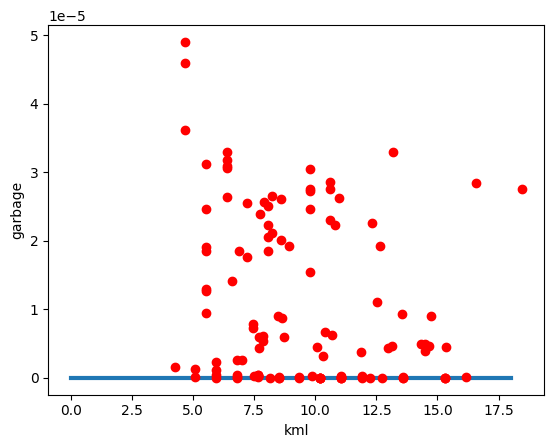

In [33]:
Y_test_plt = np.array(Y_test)
garbage_plt = np.array(garbage)

x = [0,int(max(Y_test))]
y = [0,0]
plt.plot(x,y,linewidth=3)
plt.plot(Y_test_plt, garbage_plt,'ro')
plt.ylabel('garbage')
plt.xlabel('kml')
plt.show()

### Proposing MLPs
Scaling Attributes
Training an artificial neural network is more efficient when the input values are small, as this aids in convergence. This is achieved by scaling all attributes to the range [0,1], but it must be done carefully to ensure that information from the test set does not influence training.

There are two strategies for scaling: normalization and standardization. Both have unique characteristics, advantages, and limitations, as detailed here: Feature Scaling in Machine Learning: Normalization vs Standardization

In our case, we will use standardization. Thus, for the training predictive attributes, i.e., X_train, we will subtract the mean and divide by the standard deviation:

X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)

Similarly, the same must be done for the test predictive attributes, but using standardization relative to the training set:

X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)

If the entire set X is used for standardization, the neural network will receive information from the test set through the mean and variance used to prepare the training data, which is undesirable.

### Proposal of a Single-Layer MLP
1- Refer to the documentation at MLPClassifier Documentation
2 - Train a multilayer perceptron neural network for this problem with a single layer and ten neurons<br>
2.1 Use the ReLU activation function<br>
2.2 Use the Adam solver<br>
2.3 Print the training progress<br>
2.4 Set the maximum number of epochs to 300<br>

3- Obtain the R^2 score on the test set

In [34]:
x_default_train = (X_train - X_train.mean()) / X_train.std()
x_default_test = (X_test - X_train.mean()) / X_train.std()

mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=300, verbose=True)
mlp.fit(x_default_train, Y_train)

Y_pred = mlp.predict(x_default_test)

r2 = r2_score(Y_test, Y_pred)
r2

Iteration 1, loss = 47.18928747
Iteration 2, loss = 46.89405539
Iteration 3, loss = 46.59420606
Iteration 4, loss = 46.29897142
Iteration 5, loss = 46.00449968
Iteration 6, loss = 45.71738774
Iteration 7, loss = 45.42615412
Iteration 8, loss = 45.13663941
Iteration 9, loss = 44.86058937
Iteration 10, loss = 44.57579755
Iteration 11, loss = 44.29192871
Iteration 12, loss = 44.01019942
Iteration 13, loss = 43.73224150
Iteration 14, loss = 43.45435050
Iteration 15, loss = 43.18207974
Iteration 16, loss = 42.90500942
Iteration 17, loss = 42.62281049
Iteration 18, loss = 42.35904953
Iteration 19, loss = 42.08403816
Iteration 20, loss = 41.81004234
Iteration 21, loss = 41.54002966
Iteration 22, loss = 41.27122732
Iteration 23, loss = 41.00193898
Iteration 24, loss = 40.73572570
Iteration 25, loss = 40.45985684
Iteration 26, loss = 40.19450427
Iteration 27, loss = 39.92533430
Iteration 28, loss = 39.65600322
Iteration 29, loss = 39.39127044
Iteration 30, loss = 39.11805907
Iteration 31, loss 

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.3208321841604178

### Proposing a MLP with Two Hidden Layers

1. Train a multilayer perceptron neural network for this problem with two hidden layers, with a number of neurons of your choice<br>
1.1 Use the ReLU activation function<br>
1.2 Use the Adam solver<br>
1.3 Print the training progress<br>
1.4 Set the maximum number of epochs to 300<br>

2. Obtain the R^2 score on the test set

In [35]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 20), activation='relu', solver='adam', max_iter=300, verbose=True)
mlp.fit(x_default_train, Y_train)

Y_pred = mlp.predict(x_default_test)

r2 = r2_score(Y_test, Y_pred)
r2

Iteration 1, loss = 59.09564460
Iteration 2, loss = 57.83123685
Iteration 3, loss = 56.57508171
Iteration 4, loss = 55.36526112
Iteration 5, loss = 54.17654759
Iteration 6, loss = 53.02381160
Iteration 7, loss = 51.89371185
Iteration 8, loss = 50.78836465
Iteration 9, loss = 49.65939019
Iteration 10, loss = 48.57941113
Iteration 11, loss = 47.48008439
Iteration 12, loss = 46.37747621
Iteration 13, loss = 45.26416563
Iteration 14, loss = 44.13412164
Iteration 15, loss = 42.94920534
Iteration 16, loss = 41.77050762
Iteration 17, loss = 40.50066721
Iteration 18, loss = 39.21670833
Iteration 19, loss = 37.87689369
Iteration 20, loss = 36.53350817
Iteration 21, loss = 35.10334422
Iteration 22, loss = 33.70808109
Iteration 23, loss = 32.26159182
Iteration 24, loss = 30.78888404
Iteration 25, loss = 29.27574125
Iteration 26, loss = 27.84250160
Iteration 27, loss = 26.33681336
Iteration 28, loss = 24.87367843
Iteration 29, loss = 23.40458620
Iteration 30, loss = 21.95709596
Iteration 31, loss 

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9610594518529717

### For Discussion<br>
Which model is better for this problem?

Determining the most suitable model for a problem depends on factors like the coefficient of determination ($R^2$), complexity, and interpretability. From evaluating these metrics, we find that linear regression achieves a value of 0.898, whereas the single-layer MLP performs less favorably. Consequently, despite its greater complexity, the MLP with two hidden layers achieves an improved score of 0.948. Thus, the MLP with two hidden layers is deemed the most appropriate model, as it more effectively captures underlying patterns.